In [2]:
import os

print(os.listdir())  # Lista los archivos del directorio actual

['limpio01.mp3', 'graficas_comparacion_asr.ipynb', 'Comparación_de_espectrogramas.ipynb', 'results', 'sucio01.mp3:Zone.Identifier', 'limpio.mp3:Zone.Identifier', 'sucio01.mp3']


/tmp/ipykernel_3655/251593495.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


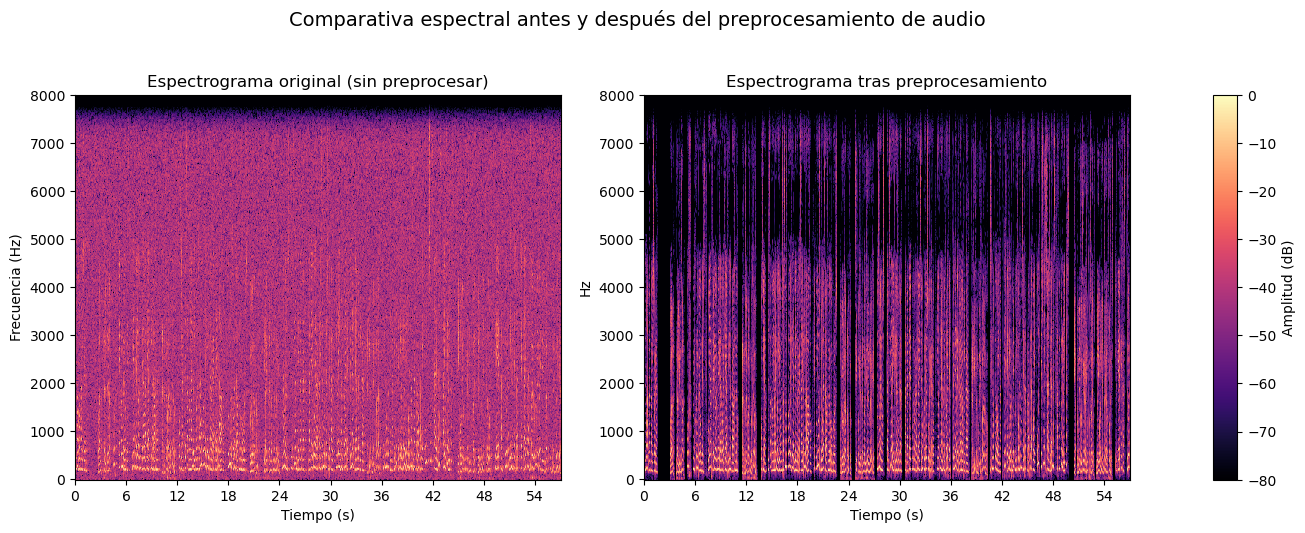

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.gridspec as gridspec  # ESTA es la forma correcta

# Rutas de los audios
original_path = "sucio01.mp3"
preprocessed_path = "limpio01.mp3"

# Cargar audios
y_orig, sr_orig = librosa.load(original_path, sr=16000)
y_proc, sr_proc = librosa.load(preprocessed_path, sr=16000)

# Configuración de espectrograma
hop_length = 512
n_fft = 1024
fmax = 8000
dur_target = 57.0  # tiempo máximo a mostrar

# Calcular espectrogramas
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_orig, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
S_proc = librosa.amplitude_to_db(np.abs(librosa.stft(y_proc, n_fft=n_fft, hop_length=hop_length)), ref=np.max)

# Crear figura comparativa
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.25)

ax1 = fig.add_subplot(gs[0])
img1 = librosa.display.specshow(S_orig, sr=sr_orig, hop_length=hop_length, x_axis='time', y_axis='hz', ax=ax1, fmax=fmax, cmap='magma')
ax1.set_xlim(0, dur_target)
ax1.set_title("Espectrograma original (sin preprocesar)")
ax1.set_ylabel("Frecuencia (Hz)")
ax1.set_xlabel("Tiempo (s)")

ax2 = fig.add_subplot(gs[1])
img2 = librosa.display.specshow(S_proc, sr=sr_proc, hop_length=hop_length, x_axis='time', y_axis='hz', ax=ax2, fmax=fmax, cmap='magma')
ax2.set_xlim(0, dur_target)
ax2.set_title("Espectrograma tras preprocesamiento")
ax2.set_xlabel("Tiempo (s)")

# Barra de color
cax = fig.add_subplot(gs[2])
cbar = fig.colorbar(img2, cax=cax)
cbar.set_label("Amplitud (dB)")

# Mostrar y guardar
plt.suptitle("Comparativa espectral antes y después del preprocesamiento de audio", fontsize=14, y=1.05)
plt.tight_layout()
plt.savefig("comparativa_espectrograma_TFM.png", dpi=300, bbox_inches="tight")
plt.show()

